# Lab 5 - Classification : Naive Bayes and Logistic Regression

**Pre Lab Reading: Naive Bayes' and Logistic Regression - 1.5 hrs**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Classification through Hypothesis Testing (Known Distribution)

**Here, the distribution of the data is already known.**

**Consider 2 one-dimensional Gaussian distributions : (1) mean -1 and variance 1 (2) mean 1 and variance 1.** <br> **a)Plot the 2 distributions on the same graph(100 data points each)** <br> **b)plot the likelihood function and the ratio of the likelihood function (a normalized function)**<br>**c) For the points x= -1.5, -0.5, 0, 0.5, 1.5, hypothesize what class they belong to.** <br> **d) Plot rough decision regions for this task. **<br>**e)For a Bayesian setup with equal probability of the hypothesis, compute the error in the estimate (as a function of x).**


**(5 points)**

**Estimated Time: 20 mins**

In [20]:
x1 = np.random.normal(-1,1, 200)
x2 = np.random.normal(1, 1, 200)
x1 = np.sort(x1)
x2 = np.sort(x2)

(array([ 3., 10., 15., 31., 41., 44., 31., 17.,  4.,  4.]),
 array([-1.90586691, -1.31519326, -0.72451961, -0.13384597,  0.45682768,
         1.04750133,  1.63817497,  2.22884862,  2.81952226,  3.41019591,
         4.00086956]),
 <a list of 10 Patch objects>)

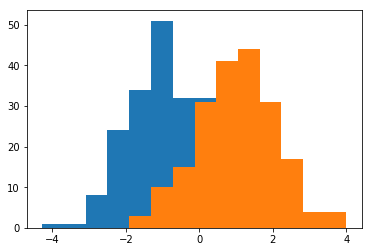

In [21]:
plt.hist(x1)
plt.hist(x2)

In [12]:
def gaussian_pdf(x, mu, sig):
    k = np.sqrt(2*np.pi)*sig
    k = 1/k
    pdf = k*np.exp(-(x-mu)**2/(2*sig*sig))
    return pdf

In [23]:
p_x1 = gaussian_pdf(x1, -1, 1)
p_x2 = gaussian_pdf(x2, 1, 1)

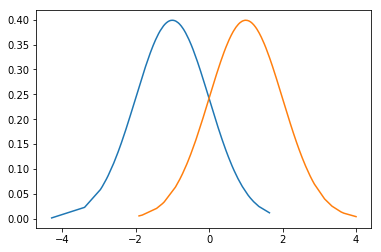

In [24]:
plt.plot(x1, p_x1)
plt.plot(x2, p_x2)

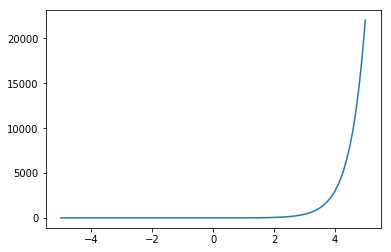

In [25]:
x = np.linspace(-5,5, 100)
r_p = gaussian_pdf(x,1,1)/gaussian_pdf(x,-1,1)
plt.plot(x,r_p)

In [30]:
x = np.array([-1.5,0.5,0,0.5,1.5])
p_x1 = gaussian_pdf(x,1,1)/gaussian_pdf(x,-1,1)
classes = []
for p in p_x1:
    if p > 1:
        classes.append(0)
    else:
        classes.append(1)
print(x)
print(classes)
print(p_x1)

[-1.5  0.5  0.   0.5  1.5]
[1, 0, 1, 0, 0]
[ 0.04978707  2.71828183  1.          2.71828183 20.08553692]


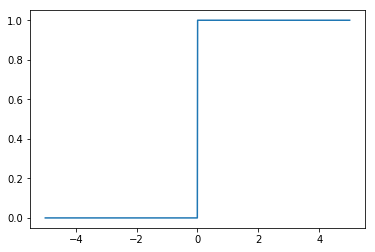

In [32]:
x = np.linspace(-5, 5, 1000)
classes = []
for x1 in x:
    if x1>=0:
        classes.append(1)
    else:
        classes.append(0)
plt.plot(x,classes)    

Write your answer here.

# Data Creation (5 points)

**(a) Load data 'Class0.txt' and 'Class1.txt' from the moodle page. Using the random seed to be 40, split it randomly into 75% train and 25% test datapoints.**

**Estimated time : 10 mins**

In [2]:
data0 = np.loadtxt('Class0.txt')
data1 = np.loadtxt('Class1.txt')
data0 = np.reshape(data0, (1000,1))
data1 = np.reshape(data1, (1000,1))

In [3]:
data0 = np.hstack((data0, np.zeros((1000,1))))
data1 = np.hstack((data1, np.ones((1000,1))))

In [4]:
data = np.concatenate((data0, data1))

In [5]:
np.random.seed(40)
np.random.shuffle(data)

In [6]:
train = data[:1500,:]
test = data[1500:,:]
print(train.shape)
print(test.shape)

(1500, 2)
(500, 2)


# Classification using Nearest Neighbours (10 points)

**Here, the class to which the new data point belongs to is found using the spatially nearest data points.**

**Use the above train data to create a new train data that has the first 500 points from class 0 and first 600 points from class 1. This will provide the data imbalance required for a thorough understanding of this concept. Use below given test points for this exercise.**  

**a)Take the number of nearest neighbours to be 10,100 and 1000. Find the class to which the given test points belong to. Code using numpy only. <br> b)Visualize the test points with respect to the train set data points. Use matplotlib.<br> c) Plot the decision boundary using scikit learn's inbuilt nearest neighbour classifier function.**

**Test Points: -0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112**

**Estimated Time: 20 mins**


In [56]:
newdata0 = data0[:500,:]
newdata1 = data1[:600,:]
newdata = np.concatenate((newdata0, newdata1))

In [70]:
def nn(test_instance, train, k):
    distance = []
    for i in range(train.shape[0]):
        distance_val = abs(test_instance - train[i][0])
        distance.append([distance_val, train[i][1]])
    distance = np.array(distance)
    distance = distance[distance[:,0].argsort()]
    #print(distance)
    sum_neighbors = distance[:k,1].sum()
    #print(sum_neighbors)
    if sum_neighbors/k > 0.5:
        neighbor = 1
    else:
        neighbor = 0
    return neighbor

In [71]:
test_points = [-0.999,0.898,0.8,0.85,0.115,0.104,-0.112]
def neighbors(test_points,train, k):
    neighbor_val = []
    for test_instance in test_points:
        neighbor_val.append(nn(test_instance, train, k))
    return neighbor_val

In [74]:
print(neighbors(test_points, newdata, 10))
print(neighbors(test_points, newdata ,100))
print(neighbors(test_points, newdata, 1000))

[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1]


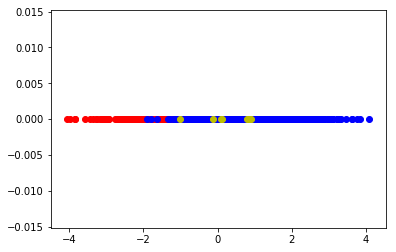

In [81]:
test_points = np.array(test_points)
plt.scatter(newdata0[:,0],[0]*newdata0.shape[0], c = 'r')
plt.scatter(newdata1[:,0],[0]*newdata1.shape[0], c = 'b')
plt.scatter(test_points, [0]*test_points.shape[0], c = 'y')

In [84]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 10)
X = newdata[:,0].reshape(-1,1)
y = newdata[:,1]
neigh.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [90]:
test_points = test_points.reshape(-1,1)
neigh.predict(test_points)

array([0., 1., 1., 1., 1., 1., 1.])

In [92]:
x = np.linspace(-1,1)
x = x.reshape(-1,1)
classes = neigh.predict(x)

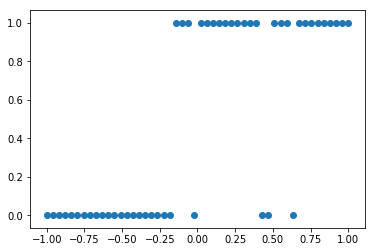

In [93]:
plt.scatter(x, classes)

# Naive Bayes (Assumed Distribution) (20 points)

**Here, the distribution of the data is assumed using some prior information. Naive Bayes works on the principle of Bayes' theorem. It assumes a prior fit for the dataset and then classifies the data into two or more classes. The prior can take the form of a Gaussian prior or any other valid probability distribution like multinomial or bernoulli.**

**Use above given train and test data for this exercise.**

**a)Assume a Gaussian prior. Use Bayes rule and Naive Bayes algorithm to find a threshold which will serve as the decision boundary. Points on one side of the boundary belong to class 0 and points on the other side of the boundary belong to class 1. Report the estimated threshold.<br> b) Use the threshold to classify the test points into one of the two classes. Report the accuracy. <br> c) How is Naive Bayes different from Nearest Neighbours(based on training done and inference computation time)?<br> d) Plot the decision region using matplotlib.
Estimated Time: 40 mins**

In [9]:
#Code here
classes = {}
classes['Class0'] = []
classes['Class1'] = []
for i in range(train.shape[0]):
    if train[i,-1] == 0:
        classes['Class0'].append(train[i,:-1])
    else:
        classes['Class1'].append(train[i,:-1])

In [10]:
class0_mean = np.mean(classes['Class0'])
class0_stdev = np.std(classes['Class0'])

In [11]:
class1_mean = np.mean(classes['Class1'])
class1_stdev = np.std(classes['Class1'])

In [18]:
def calculateclassprobabilities(input_x):
    probabilities = {}
    probabilities[0] = gaussian_pdf(input_x, class0_mean, class0_stdev)
    probabilities[1] = gaussian_pdf(input_x, class1_mean, class1_stdev)
    return probabilities

In [22]:
calculateclassprobabilities(1.06912643e+00)

{0: 0.04786571855182358, 1: 0.40310195655589703}

In [25]:
def predict_label(input_x):
    predictions = calculateclassprobabilities(input_x)
    if predictions[0] > predictions[1]:
        return 0
    else:
        return 1

In [33]:
x = np.linspace(-1.5,1.5, 50)
predictions = []
for input_x in x:
    result = predict_label(input_x)
    predictions.append(result)
for input_x in x:
    result = predict_label(input_x)
    if result > 0:
        thresh = input_x
        break

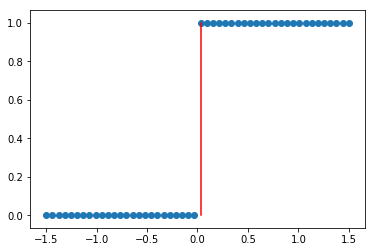

In [36]:
y = np.linspace(0,1,100)
plt.scatter(x, predictions)
plt.plot([thresh]*y.shape[0], y, c = 'r')

In [37]:
predictions = []
for input_x in test:
    if input_x[0] > thresh:
        predictions.append(1)
    else:
        predictions.append(0)
ytest = test[:,1]

In [38]:
ytest

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1.

In [40]:
tp = 0
for i in range(len(predictions)):
    if predictions[i] == ytest[i]:
        tp = tp+1
accuracy = tp/(len(predictions))
print(accuracy)

0.82


 Summarize your findings and results here.

# Logistic Regression (No assumption) (30 points)

**Here, no previous assumption is made about the data's distribution.**

**Estimated Time: 1 hr**

**Use the above given train and test data for this exercise. The y value to which class 0 belongs to can be taken as 0 and the y value to which class 1 belongs to can be taken as 1.**

**(a) Fit a linear regression model to the dataset using sklearn. Report the accuracy. Use the threshold as 0.5 to classify to class 0 or class 1. You will find that linear regression is not apt to solve the problem.**

In [44]:
# Insert code here.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
xtrain = train[:,0].reshape(-1,1)
ytrain = train[:,1]
xtest = test[:,0].reshape(-1,1)
ytest = test[:,1]

In [45]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
predict_val = lr.predict(xtest)

In [46]:
predict_label = []
for val in predict_val:
    if val > 0.5:
        predict_label.append(1)
    else:
        predict_label.append(0)


In [47]:
print(accuracy_score(predict_label, ytest))

0.824


**(b) Logistic Regression uses the sigmoid function for binary classification. Plot the sigmoid function for the range x : [-100,100]. This exercise will help you understand the shape of the sigmoid function and show its suitability in binary classification problems.**



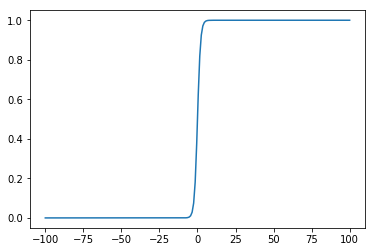

In [49]:
x = np.linspace(-100,100, 200)
sigmoid = 1/(1+ np.exp(-x))
plt.plot(x, sigmoid)

**(c) Comment on the nature of the graph (specifically : domain,range,behaviour in extreme inputs). This task will give you further insight on the sigmoid function, which will help you while implementing logistic regression.**

- The domain of the sigmoid function is all real numbers ( -inf, +inf ). The return value of the sigmoid function ranges from     [0,1].
- As the value of x approaches positive infinity the value of sigmoid converges to 1, - inf converges to zero.


**(d) Derive and plot the gradients of the sigmoid function for the same range. This is needed for gradient descent in logistic regression.**

derivative of sigmoid:
    d/dx(1/(1+exp(-x)) = -((1+exp(-x))^2)*d/dx((1+exp(-x))
    
    -> -((1+exp(-x))^2) * ( -exp(-x))
    -> exp(-x)/((1+exp(-x))^2)

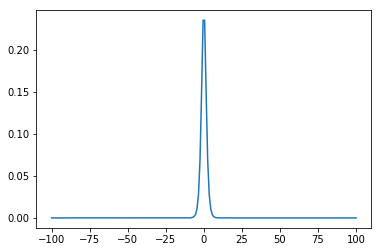

In [50]:
# Insert code here
der_sigmoid = np.exp(-x)/((1+np.exp(-x))**2)
plt.plot(x, der_sigmoid)

**(e)Again, use the above created train and test set. Implement logistic regression (using only numpy) to predict whether the datapoints belongs to class 0 or 1. Gradient descent also has to be implemented using numpy. Tune the learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 to arrive at a good solution. Use a random initialization of weight and bias.
<br>Estimated time: 1 hr**


In [0]:
# Insert code here

**(f) Plot the decision boundary.**

In [0]:
# Insert code here

**(f) What are the advantages of using a Negative Log Likelihood cost function here, as opposed to a least squares cost function in linear regression? (answer should be based on the difference in the tasks and the output functions, convexity of the function).**


Write answer here.

**a)Load LogReg_2d_data.txt and LogReg_2d_labels.txt from moodle. Perform random shuffle and train test split(75:25). Use sklearn to perform logistic regression on the dataset. <br>b)Report the accuracy and F1 score. <br>c)Visualize the decision boundary.**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [51]:
#Code here
X = np.loadtxt('LogReg_2d_data.txt')
y = np.loadtxt('LogReg_2d_Labels.txt')
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [55]:
logr = LogisticRegression()
logr.fit(xtrain, ytrain)
predictions = logr.predict(xtest)

In [57]:
accuracy_score(predictions, ytest)

0.96

In [59]:
f1_score(predictions, ytest)

0.9565217391304348

In [61]:
confusion_matrix(predictions, ytest)

array([[13,  0],
       [ 1, 11]], dtype=int64)

Write your answer here

# The End